 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = pd.read_csv("whale_returns.csv")
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isna().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(how = "any", inplace = True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns = pd.read_csv("algo_returns.csv")
algo_returns.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isna().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(how = "any", inplace = True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv("sp500_history.csv")
sp500_history.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [9]:
# Check Data Types
sp500_history.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history["Date"] = pd.to_datetime(sp500_history["Date"])

Close = []

for close in sp500_history["Close"]:
    close_value = close.strip("$")
    Close.append(close_value)
    
    
sp500_history["Close"] = Close
sp500_history["Close"] = pd.to_numeric(sp500_history["Close"])

In [11]:
# Calculate Daily Returns
sp500_history["Daily_returns"] = (sp500_history["Close"]/sp500_history["Close"].shift(1)) - 1

In [12]:
# Drop nulls
sp500_history.dropna(how = "any", inplace = True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history.rename(columns = {"Close":"sp500"}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
whale_algo_merged = pd.merge(whale_returns, algo_returns, on = "Date", how = "outer")

# covert date column to datetime
whale_algo_merged["Date"] = pd.to_datetime(whale_algo_merged["Date"])


combined_returns = pd.merge(whale_algo_merged, sp500_history, on = "Date", how = "outer")
combined_returns.dropna(how = "any", inplace = True)
combined_returns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,Daily_returns
0,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78,0.004408
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53,-0.001195
2,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04,0.014378
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26,-0.003929
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43,0.017254
...,...,...,...,...,...,...,...,...,...
1047,2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,2905.58,-0.000509
1048,2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06,0.002279
1049,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45,-0.001577
1050,2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03,-0.001011


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

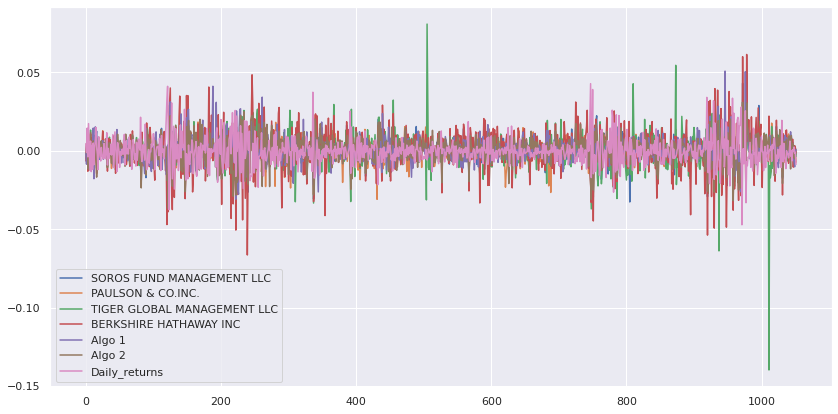

In [15]:
# Plot daily returns of all portfolios
%matplotlib inline 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()


combined_returns.drop(["Date", "sp500"], axis= "columns").plot(figsize = (14, 7))
# plt.figure(figsize = (20, 10))
plt.show()

#### Calculate and Plot cumulative returns.

<function matplotlib.pyplot.show(close=None, block=None)>

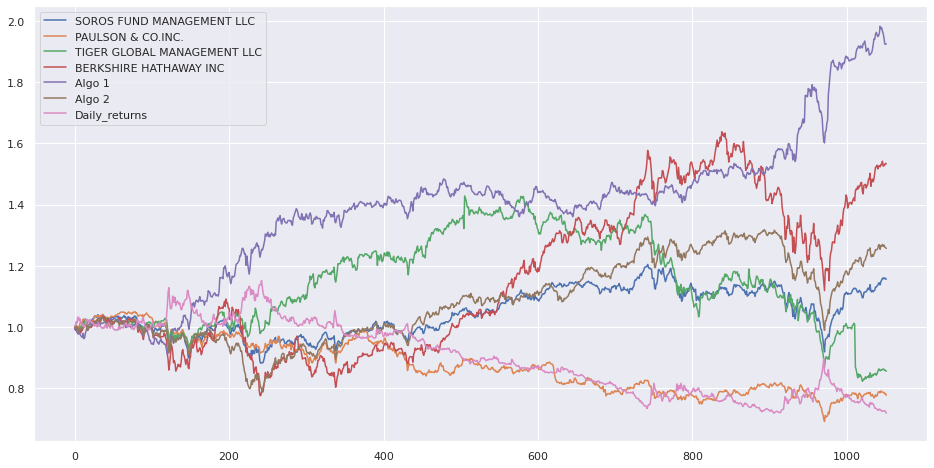

In [16]:
# Calculate cumulative returns of all portfolios
only_combined_returns = combined_returns.drop(["Date", "sp500"], axis= "columns")

cum_returns = 1 + only_combined_returns

cumulative_returns = cum_returns.cumprod()
# Plot cumulative returns
sns.set()
cumulative_returns.plot(figsize = (16, 8))
plt.show

---Algo 1 is at the top followed by BERKSHIRE HATHAWAY LLC

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


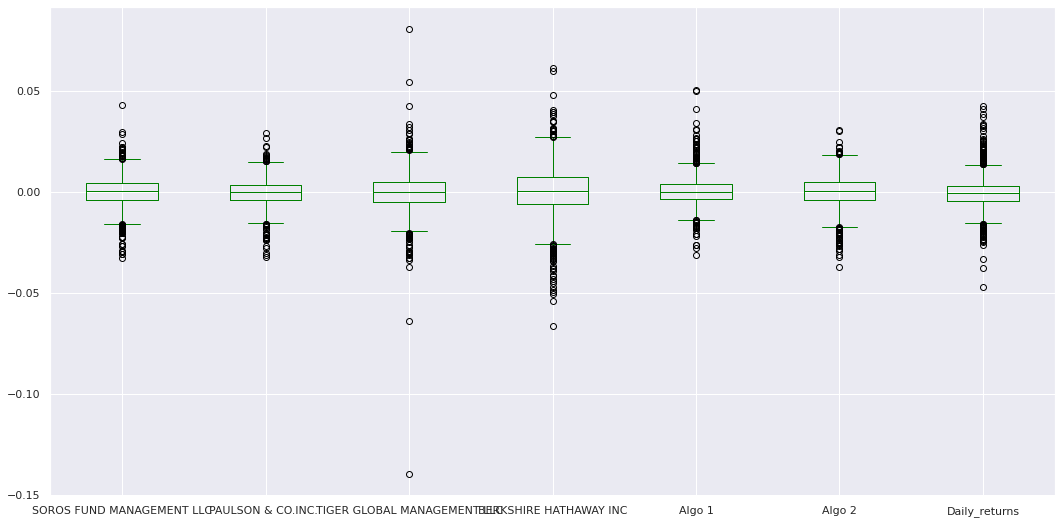

In [43]:
# Box plot to visually show risk
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

only_combined_returns.plot(kind = "box", figsize = (18,9), color = "green")
plt.show()

# only_combined_returns.columns

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios

for item in only_combined_returns.columns:
    print(f"{item}: {only_combined_returns[item].std()}")

SOROS FUND MANAGEMENT LLC: 0.007896188745252343
PAULSON & CO.INC. : 0.007025515427605778
TIGER GLOBAL MANAGEMENT LLC: 0.010897305414583357
BERKSHIRE HATHAWAY INC: 0.0129187530622018
Algo 1: 0.00762269085482205
Algo 2: 0.008341234467834722
Daily_returns: 0.00858688974707399


### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500


# Determine which portfolios are riskier than the S&P 500
portfolio_stds = pd.DataFrame(only_combined_returns.std()).rename(columns = {0:"std"})
above_sp500 = portfolio_stds[portfolio_stds["std"] > portfolio_stds.loc["Daily_returns", "std"]]
above_sp500

,std
TIGER GLOBAL MANAGEMENT LLC,0.010897
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
import math
math.sqrt(252) * portfolio_stds

,std
SOROS FUND MANAGEMENT LLC,0.125348
PAULSON & CO.INC.,0.111527
TIGER GLOBAL MANAGEMENT LLC,0.172989
BERKSHIRE HATHAWAY INC,0.205079
Algo 1,0.121006
Algo 2,0.132413
Daily_returns,0.136313


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

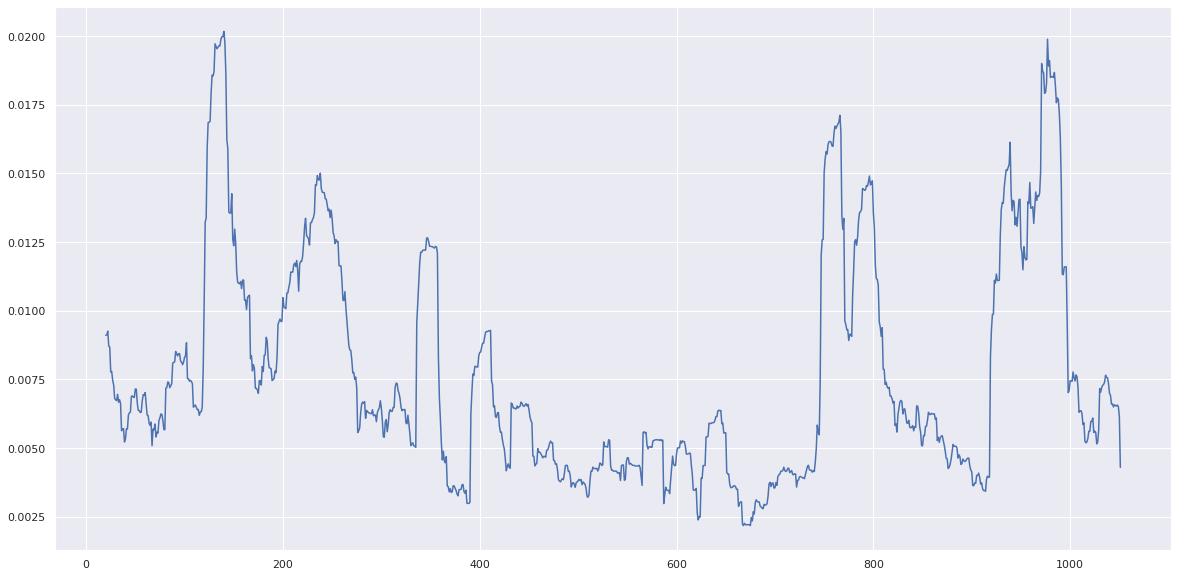

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
days21_window_sp500 = only_combined_returns[["Daily_returns"]].rolling(window = 21)
std_days21_window_sp500 = days21_window_sp500.std()

# Plot the rolling standard deviation
%matplotlib inline 
sns.set()

plt.figure(figsize = (20, 10))
plt.plot(std_days21_window_sp500)
plt.show()

### Calculate and plot the correlation

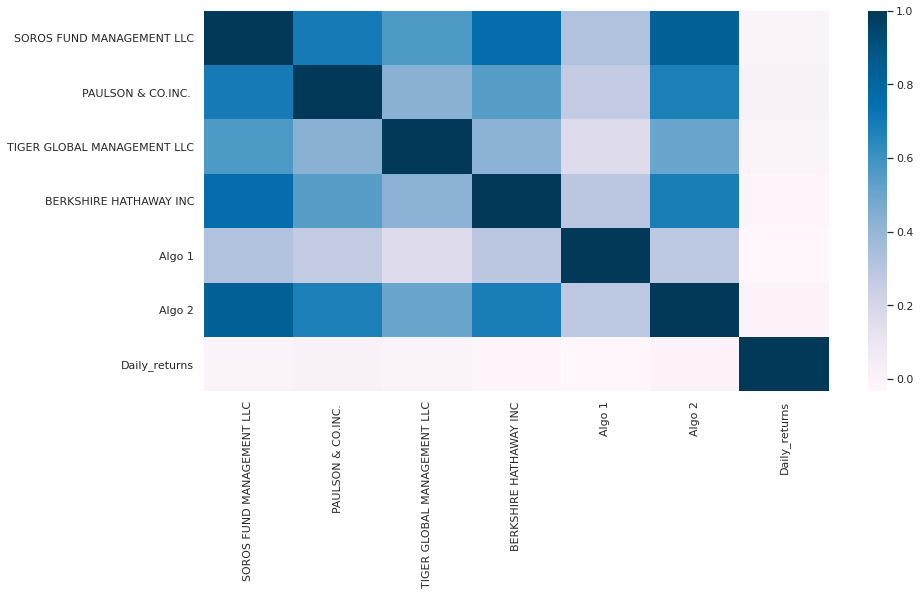

In [22]:
# Calculate the correlation
only_combined_returns.corr()
# Display de correlation matrix
plt.figure(figsize = (14, 7))
sns.heatmap(only_combined_returns.corr(), cmap = "PuBu")
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

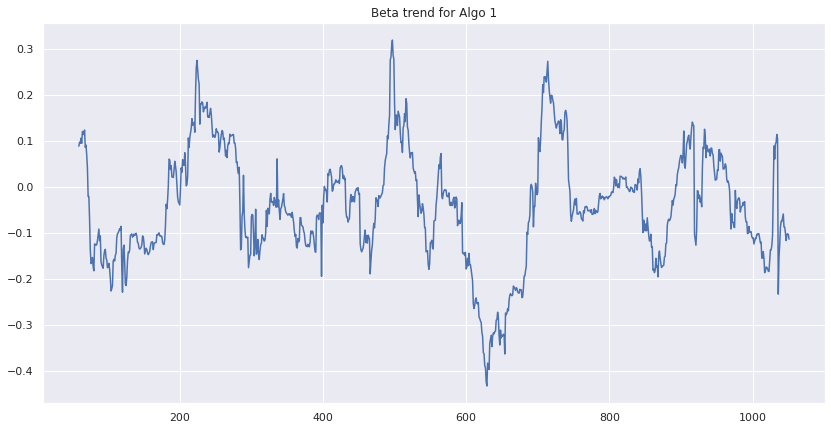

In [23]:
# Calculate covariance of a single portfolio
rolling_cov_algo1 = only_combined_returns['Algo 1'].rolling(window=60).cov(only_combined_returns['Daily_returns'])

# Calculate variance of S&P 500
rolling_var_sp500 = only_combined_returns['Daily_returns'].rolling(window=60).var()

# Computing beta
# beta = covariance/ variance 
beta_rolling = rolling_cov_algo1 / rolling_var_sp500

# Plot beta trend
plt.figure(figsize=(14, 7))
plt.title("Beta trend for Algo 1")
plt.plot(beta_rolling)
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

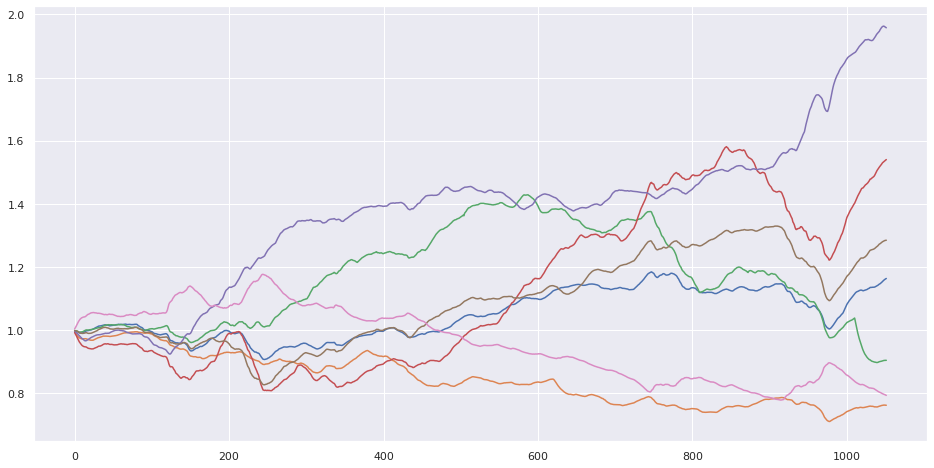

In [24]:
# Use `ewm` to calculate the rolling window
ewm_only_combined_returns = only_combined_returns.ewm(span = 21,adjust = False).mean()
# (1+ewm_only_combined_returns).cumprod().plot(figsize = (20,10))
plt.figure(figsize=(16, 8))
plt.plot((1+ewm_only_combined_returns).cumprod())
plt.show()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
returns_sharpe_ratios = only_combined_returns.mean()*252/(only_combined_returns.std()*math.sqrt(252))
print(returns_sharpe_ratios)

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
Daily_returns                 -0.518582
dtype: float64


<AxesSubplot:>

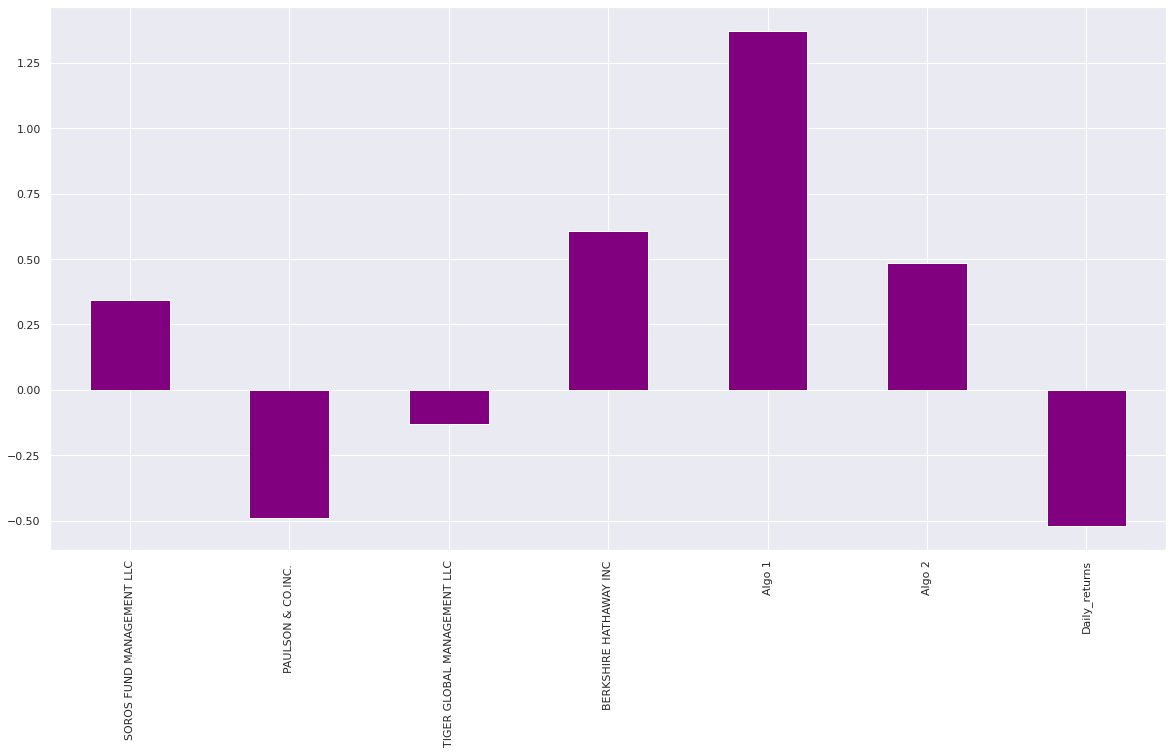

In [26]:
# Visualize the sharpe ratios as a bar plot
returns_sharpe_ratios.plot(kind = "bar", color = "purple", figsize = (20, 10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 performed exemplary well however algo2 performed poorly 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [27]:
# Reading data from 1st stock
goog = pd.read_csv("goog_historical.csv")
goog.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [28]:
# Reading data from 2nd stock
aapl = pd.read_csv("aapl_historical.csv")
aapl.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [29]:
# Reading data from 3rd stock
cost = pd.read_csv("cost_historical.csv")
cost.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [30]:
# Combine all stocks in a single DataFrame
# rename all the columns 
goog.rename(columns = {"NOCP":"GOOG"}, inplace = True)
aapl.rename(columns = {"NOCP":"AAPL"}, inplace = True)
cost.rename(columns = {"NOCP":"COST"}, inplace = True)

# goog_aapl = pd.merge(goog, aapl, how = "inner")
historical = pd.concat((goog, aapl, cost), axis = 1, join = "inner")
historical = historical.loc[:,~historical.columns.duplicated()]
historical.head()

,Symbol,Trade DATE,GOOG,AAPL,COST
0,GOOG,5/9/2019,1162.38,200.72,243.47
1,GOOG,5/8/2019,1166.27,202.90,241.34
2,GOOG,5/7/2019,1174.10,202.86,240.18
3,GOOG,5/6/2019,1189.39,208.48,244.23
4,GOOG,5/3/2019,1185.40,211.75,244.62


In [31]:
# Reset Date index
historical.reset_index()

,index,Symbol,Trade DATE,GOOG,AAPL,COST
0,0,GOOG,5/9/2019,1162.38,200.72,243.47
1,1,GOOG,5/8/2019,1166.27,202.90,241.34
2,2,GOOG,5/7/2019,1174.10,202.86,240.18
3,3,GOOG,5/6/2019,1189.39,208.48,244.23
4,4,GOOG,5/3/2019,1185.40,211.75,244.62
...,...,...,...,...,...,...
245,245,GOOG,5/17/2018,1078.59,186.99,199.60
246,246,GOOG,5/16/2018,1081.77,188.18,198.71
247,247,GOOG,5/15/2018,1079.23,186.44,195.48
248,248,GOOG,5/14/2018,1100.20,188.15,195.88


In [32]:
# Reorganize portfolio data by having a column per symbol
goog.rename(columns = {"NOCP":"GOOG"}, inplace = True)
aapl.rename(columns = {"NOCP":"AAPL"}, inplace = True)
cost.rename(columns = {"NOCP":"COST"}, inplace = True)

In [33]:
# Calculate daily returns
historical["goog_daily_returns"] = (historical["GOOG"] / historical["GOOG"].shift(1)) - 1
historical["aapl_daily_returns"] = (historical["AAPL"] / historical["AAPL"].shift(1)) - 1
historical["cost_daily_returns"] = (historical["COST"] / historical["COST"].shift(1)) - 1
# Drop NAs
historical.dropna(how = "any", inplace = True)
# Display sample data
historical_data = historical[["Trade DATE", "goog_daily_returns", "aapl_daily_returns", "cost_daily_returns"]]
historical_data.rename(columns = {"Trade DATE":"DATE"}, inplace = True)
historical_data = historical_data.set_index("DATE")
historical_data

/home/ustadhi/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,goog_daily_returns,aapl_daily_returns,cost_daily_returns
DATE,,,
5/8/2019,0.003347,0.010861,-0.008749
5/7/2019,0.006714,-0.000197,-0.004806
5/6/2019,0.013023,0.027704,0.016862
5/3/2019,-0.003355,0.015685,0.001597
5/2/2019,-0.019226,-0.012279,-0.007890
...,...,...,...
5/17/2018,0.011469,0.003650,0.003217
5/16/2018,0.002948,0.006364,-0.004459
5/15/2018,-0.002348,-0.009246,-0.016255


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]
portfolios = historical_data.dot(weights)
# Calculate portfolio return
portfolios_return = portfolios.pct_change()
portfolios_return.dropna(inplace = True)

# Display sample data
portfolios_return.head()

DATE
5/7/2019    -0.686741
5/6/2019    32.676304
5/3/2019    -0.758163
5/2/2019    -3.828575
5/1/2019    -1.170653
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
returns_portfolios = pd.concat((portfolios_return, historical_data), axis = 1, join = "outer")
returns_portfolios.rename(columns = {"0":"portfolios"}, inplace = True)

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returns_portfolios.dropna(how = "any", inplace = True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
portfolio_stds = pd.DataFrame(returns_portfolios.std()).rename(columns = {0:"std"})
math.sqrt(252) * portfolio_stds

,std
0,310.458997
goog_daily_returns,0.265836
aapl_daily_returns,0.300791
cost_daily_returns,0.213623


### Calculate and plot rolling `std` with 21-day window

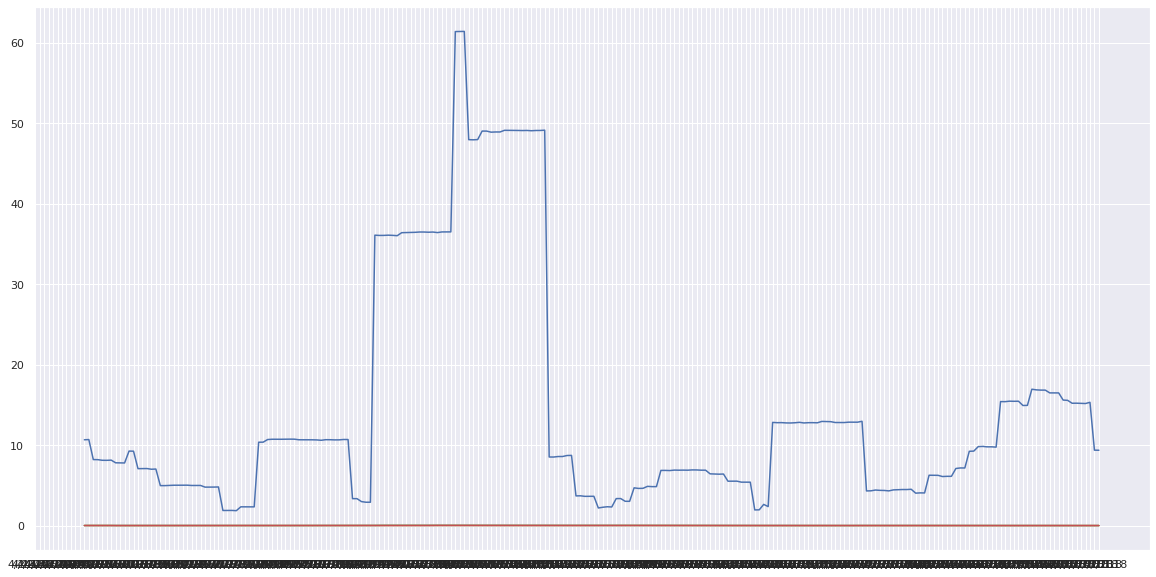

In [38]:
# Calculate rolling standard deviation
days21_window_portfolios = returns_portfolios.rolling(window = 21)
std_days21_window_portfolios = days21_window_portfolios.std()
# Plot rolling standard deviation
%matplotlib inline 
sns.set()

plt.figure(figsize = (20, 10))
plt.plot(std_days21_window_portfolios)
plt.show()

### Calculate and plot the correlation

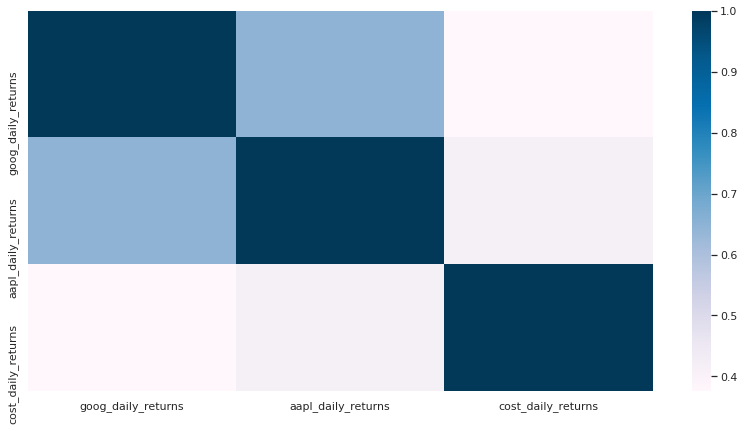

In [39]:
# Calculate and plot the correlation
%matplotlib inline 
sns.set()

correlation = returns_portfolios.drop(0, axis = 1).corr()
plt.figure(figsize = (14, 7))
sns.heatmap(correlation, cmap = "PuBu")
plt.show()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of my portfolio'}, xlabel='DATE'>

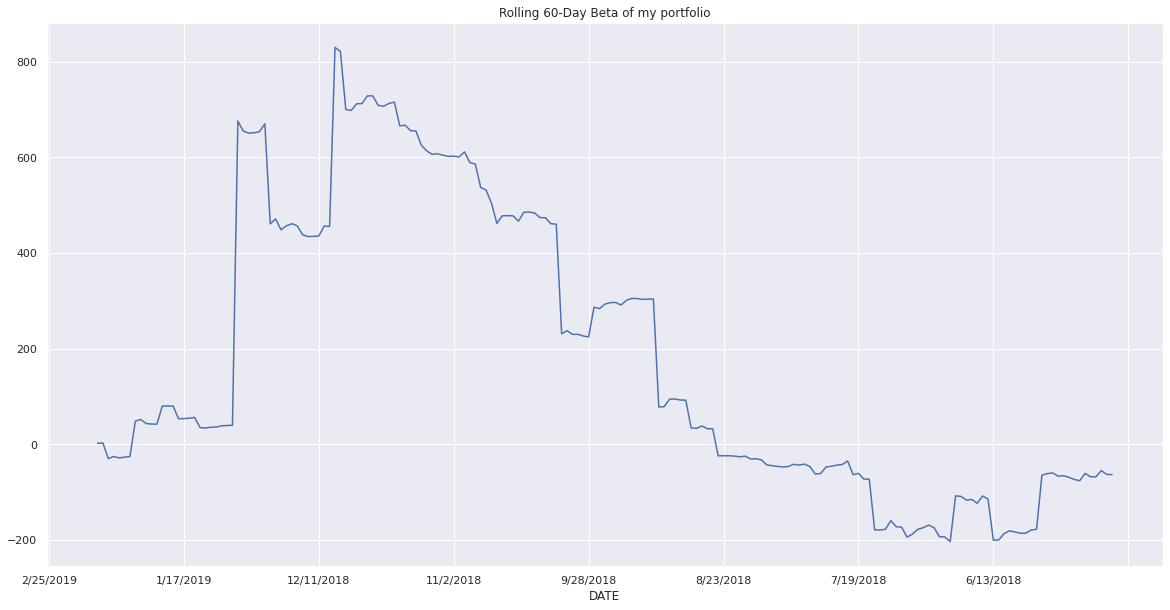

In [40]:
# Calculate and plot Beta
rolling_covariance = returns_portfolios[0].rolling(window=60).cov(returns_portfolios["goog_daily_returns"])
rolling_variance = returns_portfolios['goog_daily_returns'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualzied Sharpe Ratios
work_days = returns_portfolios.count()
sharpeRatios = returns_portfolios.mean()*work_days/(returns_portfolios.std()*np.sqrt(work_days))

<AxesSubplot:title={'center':'sharpe ratios'}>

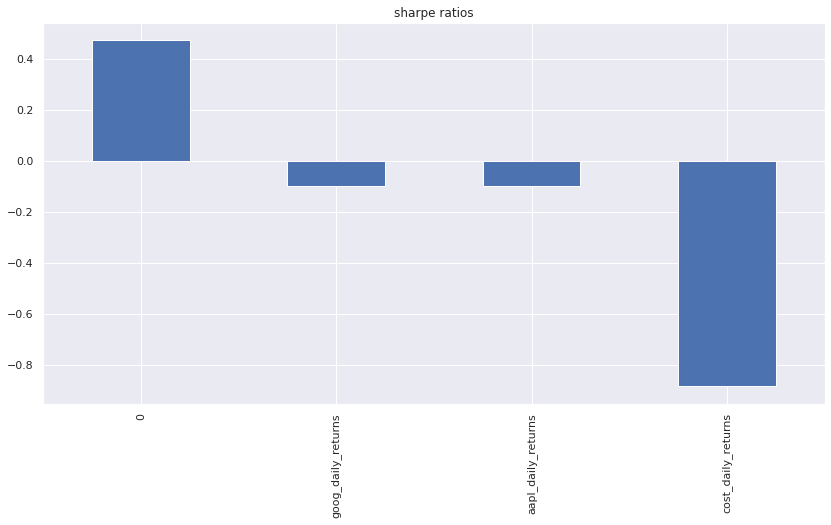

In [42]:
# Visualize the sharpe ratios as a bar plot
sharpeRatios.plot(kind = 'bar', title = "sharpe ratios", figsize = (14, 7))

### How does your portfolio do?

All the portfolios are performing poorly. They are at the negative mark